<p style="font-family: Arial; font-size:3em;color:black;"> Lab Exercise 8</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
# Import the built-in iris dataset to work with
iris = datasets.load_iris() # the dataset consists of 3 different types of irises' (Setosa, Versicolour, and Virginica) petal and sepal length
print("iris dataset",iris.data[:10,:])
X = iris.data[:, :2] # We only want to use the first two features (Sepal Length, Sepal Width)
y = iris.target # corresponding to 'setosa', 'versicolor', 'virginica
print("iris target",y[:10,])

iris dataset [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
iris target [0 0 0 0 0 0 0 0 0 0]


Best parameters from GridSearchCV: {'C': 0.1, 'gamma': 'scale'}
Best cross-validation score: 0.819047619047619
Accuracy on test set: 0.8222222222222222


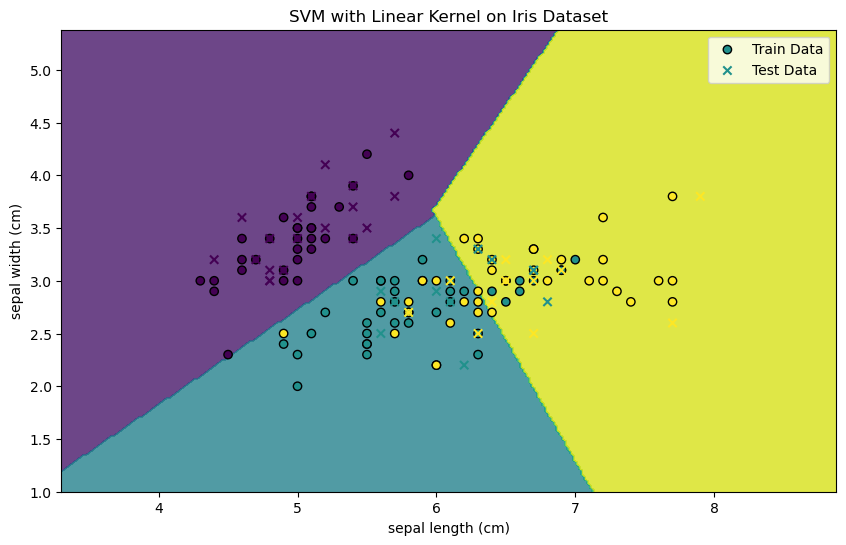

In [7]:
# Develop a linear Support Vector Machine to classify the irises
# Use GridSearchCV to optimize the model's hyperparameters (C, gamma, kernel)
# Compare the accuracies of the above two models

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Develop a linear Support Vector Machine to classify the irises
svm_model = svm.SVC(kernel='linear')

# Set up the parameters for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output results
print("Best parameters from GridSearchCV:", best_params)
print("Best cross-validation score:", best_score)
print("Accuracy on test set:", accuracy)

# Plotting decision boundary
plt.figure(figsize=(10, 6))
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the result for the mesh grid
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test Data')  # Updated line
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM with Linear Kernel on Iris Dataset')
plt.legend()
plt.show()